In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *
import datetime

In [2]:
dc=pd.read_excel(r"C:\Users\Mark 1\damprd_df_strd.xlsx")
dc = dc.loc[:, ~dc.columns.str.contains('^Unnamed')]
dc.tail()

,date,original_val,mean_based,max_based,mean_max_based,max_mean_based,mean_last_based,last_mean_based,last_based,middle_based
174,2020-09-20,1135,1177,1557,1293,1417,1160,1097,1081,1015
175,2020-09-21,1056,1170,1557,1286,1416,1140,1151,1121,1211
176,2020-09-22,1085,1171,1557,1287,1416,1061,1084,982,1269
177,2020-09-23,1123,1112,1269,1194,1182,1061,1169,1115,1081
178,2020-09-24,0,1133,1269,1220,1179,1122,1175,1162,1121


In [3]:
dce=pd.read_excel(r"C:\Users\Mark 1\damerrprd_df_strd.xlsx")
dce = dce.loc[:, ~dce.columns.str.contains('^Unnamed')]
errdf=dce=dce.loc[:,["date","mb","mxb","mxb","memb","mxmb","mlb","lmb","lb","mdb"]]
errdf.tail()

,date,mb,mxb,mxb,memb,mxmb,mlb,lmb,lb,mdb
174,2020-09-20,-42,-422,-422,-158,-282,-25,38,54,120
175,2020-09-21,-114,-501,-501,-230,-360,-84,-95,-65,-155
176,2020-09-22,-86,-472,-472,-202,-331,24,1,103,-184
177,2020-09-23,11,-146,-146,-71,-59,62,-46,8,42
178,2020-09-24,-1133,-1269,-1269,-1220,-1179,-1122,-1175,-1162,-1121


In [4]:
erdt=pd.read_excel(r"C:\Users\Mark 1\dderr_df.xlsx")
erdt = erdt.loc[:, ~erdt.columns.str.contains('^Unnamed')]
erdt['original_val']=erdt['original_val'].astype('int')
erdt['date']=erdt['date'].astype('datetime64[ns]')
erdt.tail()

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
174,2020-09-20,lmb,mlb,38,-25,1135,1097,1160
175,2020-09-21,No,lb,No,-65,1056,No,1121
176,2020-09-22,lmb,mb,1,-86,1085,1084,1171
177,2020-09-23,lb,lmb,8,-46,1123,1115,1169
178,2020-09-24,No,mdb,No,-1121,0,No,1121


In [5]:
erdtpv=erdt[erdt['mipv']!='No']
erdtpv['mipe']=erdtpv['mipe'].astype('str')
erdtpv['mipv']=erdtpv['mipv'].astype('int')
erdtpv['pprd_val']=erdtpv['pprd_val'].astype('int')
erdtpv

<ipython-input-5-ba78fec52151>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtpv['mipe']=erdtpv['mipe'].astype('str')
<ipython-input-5-ba78fec52151>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtpv['mipv']=erdtpv['mipv'].astype('int')
<ipython-input-5-ba78fec52151>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
0,2020-03-31,mdb,mb,4,-3,6,2,9
1,2020-04-01,lb,mdb,3,-2,6,3,8
2,2020-04-02,mb,memb,4,-12,16,12,28
3,2020-04-03,mb,lmb,1,-6,14,13,20
4,2020-04-04,lb,mb,1,-3,13,12,16
...,...,...,...,...,...,...,...,...
171,2020-09-17,mdb,memb,5,-109,1175,1170,1284
172,2020-09-18,lb,memb,10,-60,1221,1211,1281
174,2020-09-20,lmb,mlb,38,-25,1135,1097,1160
176,2020-09-22,lmb,mb,1,-86,1085,1084,1171


In [6]:
erdtnv=erdt[erdt['mxnv']!='No']
erdtnv['mxne']=erdtnv['mxne'].astype('str')
erdtnv['mxnv']=erdtnv['mxnv'].astype('int')
erdtnv['nprd_val']=erdtnv['nprd_val'].astype('int')
erdtnv

<ipython-input-6-532af38dbbcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtnv['mxne']=erdtnv['mxne'].astype('str')
<ipython-input-6-532af38dbbcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtnv['mxnv']=erdtnv['mxnv'].astype('int')
<ipython-input-6-532af38dbbcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
0,2020-03-31,mdb,mb,4,-3,6,2,9
1,2020-04-01,lb,mdb,3,-2,6,3,8
2,2020-04-02,mb,memb,4,-12,16,12,28
3,2020-04-03,mb,lmb,1,-6,14,13,20
4,2020-04-04,lb,mb,1,-3,13,12,16
...,...,...,...,...,...,...,...,...
174,2020-09-20,lmb,mlb,38,-25,1135,1097,1160
175,2020-09-21,No,lb,No,-65,1056,No,1121
176,2020-09-22,lmb,mb,1,-86,1085,1084,1171
177,2020-09-23,lb,lmb,8,-46,1123,1115,1169


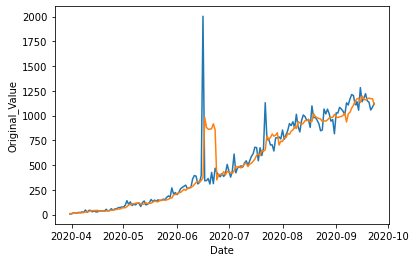

In [7]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['mean_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

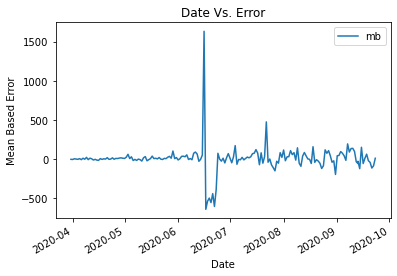

In [8]:
errdf[:len(errdf)-1].plot(x="date",y="mb")
plt.xlabel("Date")
plt.ylabel("Mean Based Error")
plt.title("Date Vs. Error")


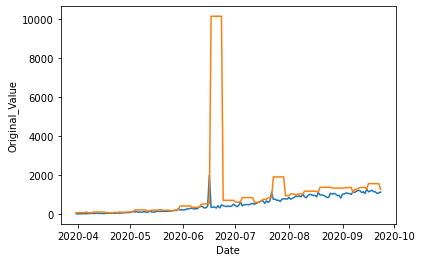

In [9]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['max_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

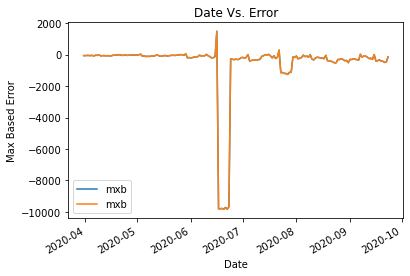

In [10]:
errdf[:len(errdf)-1].plot(x="date",y="mxb")
plt.xlabel("Date")
plt.ylabel("Max Based Error")
plt.title("Date Vs. Error")


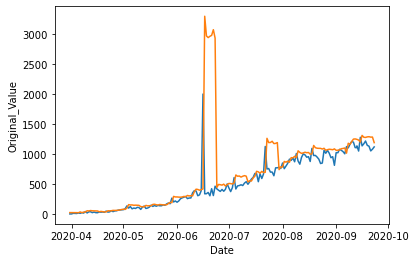

In [11]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['mean_max_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

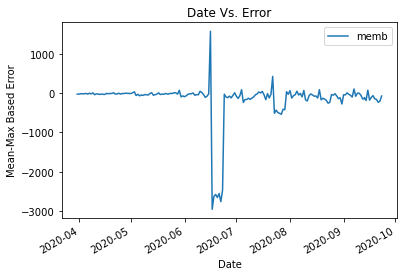

In [12]:
errdf[:len(errdf)-1].plot(x="date",y="memb")
plt.xlabel("Date")
plt.ylabel("Mean-Max Based Error")
plt.title("Date Vs. Error")


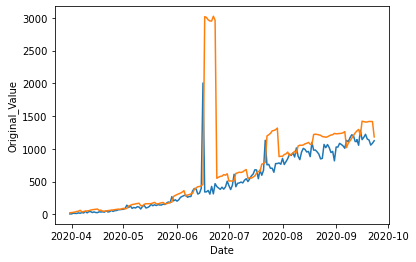

In [13]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['max_mean_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

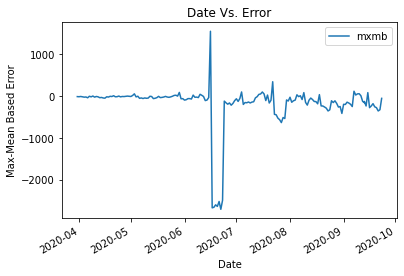

In [14]:
errdf[:len(errdf)-1].plot(x="date",y="mxmb")
plt.xlabel("Date")
plt.ylabel("Max-Mean Based Error")
plt.title("Date Vs. Error")


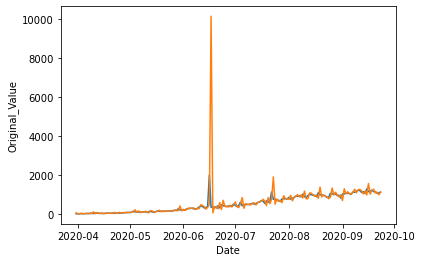

In [15]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['last_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

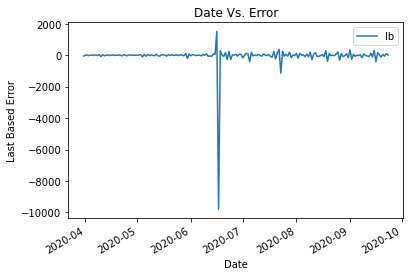

In [16]:
errdf[:len(errdf)-1].plot(x="date",y="lb")
plt.xlabel("Date")
plt.ylabel("Last Based Error")
plt.title("Date Vs. Error")


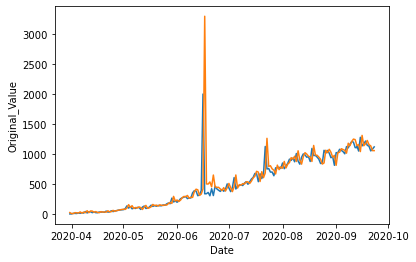

In [17]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['mean_last_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

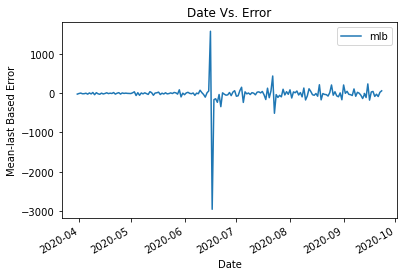

In [18]:
errdf[:len(errdf)-1].plot(x="date",y="mlb")
plt.xlabel("Date")
plt.ylabel("Mean-last Based Error")
plt.title("Date Vs. Error")


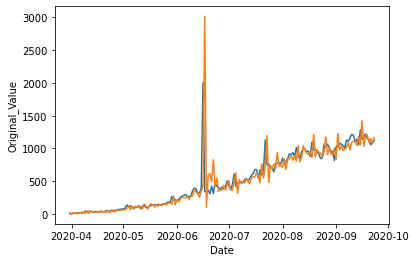

In [19]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['last_mean_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

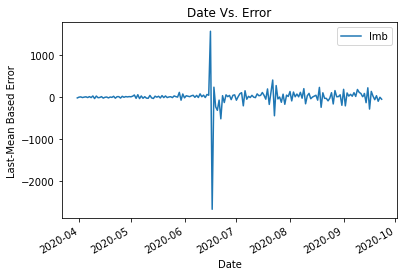

In [20]:
errdf[:len(errdf)-1].plot(x="date",y="lmb")
plt.xlabel("Date")
plt.ylabel("Last-Mean Based Error")
plt.title("Date Vs. Error")


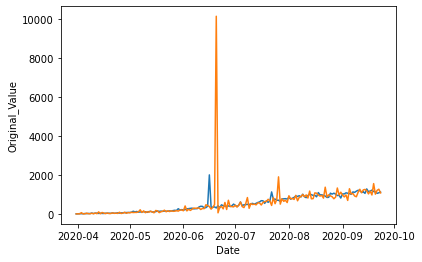

In [21]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['middle_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

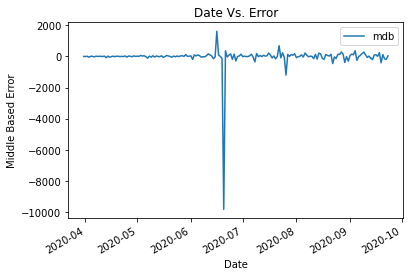

In [22]:
errdf[:len(errdf)-1].plot(x="date",y="mdb")
plt.xlabel("Date")
plt.ylabel("Middle Based Error")
plt.title("Date Vs. Error")


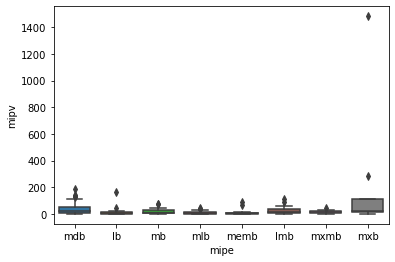

In [23]:
sns.boxplot(x='mipe',y='mipv',data=erdtpv,width=0.75)


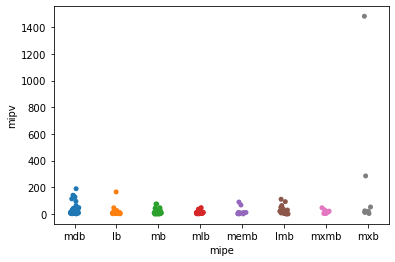

In [24]:
sns.stripplot(x='mipe',y='mipv',data=erdtpv,jitter=True)

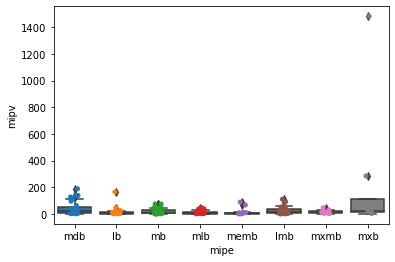

In [25]:
sns.boxplot(x='mipe',y='mipv',data=erdtpv)

sns.stripplot(x='mipe',y='mipv',data=erdtpv,jitter=True)

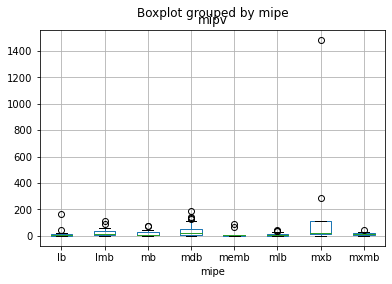

In [26]:
erdtpv.boxplot(by='mipe', column=['mipv'], grid=True)

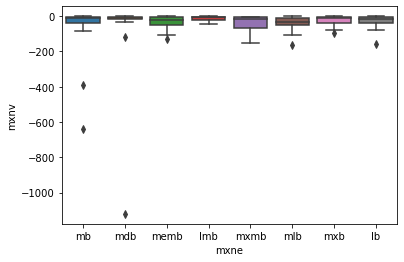

In [27]:
sns.boxplot(x='mxne',y='mxnv',data=erdtnv)

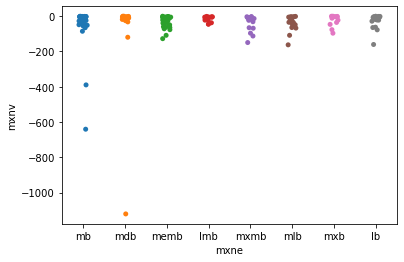

In [28]:
sns.stripplot(x='mxne',y='mxnv',data=erdtnv,jitter=True)

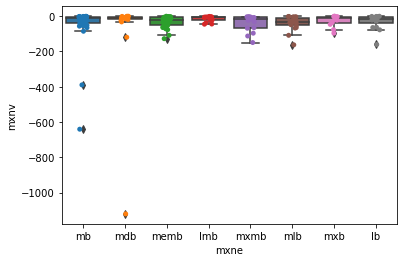

In [29]:
sns.boxplot(x='mxne',y='mxnv',data=erdtnv)
sns.stripplot(x='mxne',y='mxnv',data=erdtnv,jitter=True)

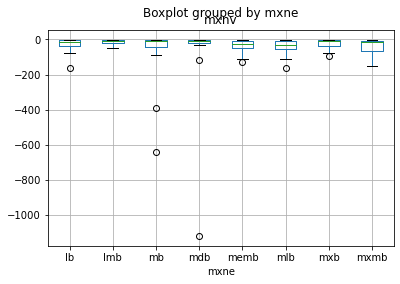

In [30]:
erdtnv.boxplot(by='mxne', column=['mxnv'], grid=True)